In [6]:
# 라이브러리 로드
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 코랩에서는 이렇게 설정해줘야 그래프 표시가 가능!
%matplotlib inline 

# 노트북 warning 안보이게 무시 처리
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보인다.
# 한글이 출력될 수 있도록 폰트 설정
import os

# 윈도우, 맥 외의 os느 별도로 설정해 주어야함
if os.name == 'posix' : # 포직스면 맥임.
  plt.rc('font', family='AppleGothic')
else:
  plt.rc('font', family='Malgun Gothic') # 윈도우일 경우
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus=False)

In [8]:
# 한글폰트 깨지는거 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [9]:
# 레티나 설정을 해주면 글씨가 좀더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

In [10]:
# 데이터 로드하기
from google.colab import drive
drive.mount('/content/working_drive')

import os

working_dir = '2017캐글설문'

colab_default_dir = '/content/working_drive/MyDrive/Colab Notebooks/BT/캐글 실습으로 배우는 데이터 사이언스/data/'

original_dir = os.getcwd() # save current dir

try :
  os.chdir(colab_default_dir)
  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

  os.chdir(working_dir) # change working dir
  print('current dir =', os.getcwd())

except Exception as err:

  os.chdir(original_dir)
  print(str(err))

Drive already mounted at /content/working_drive; to attempt to forcibly remount, call drive.mount("/content/working_drive", force_remount=True).
current dir = /content/working_drive/MyDrive/Colab Notebooks/BT/캐글 실습으로 배우는 데이터 사이언스/data/2017캐글설문


In [11]:
question = pd.read_csv('schema.csv')
question.shape

(290, 3)

In [12]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [13]:
mcq = pd.read_csv('multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [14]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [15]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


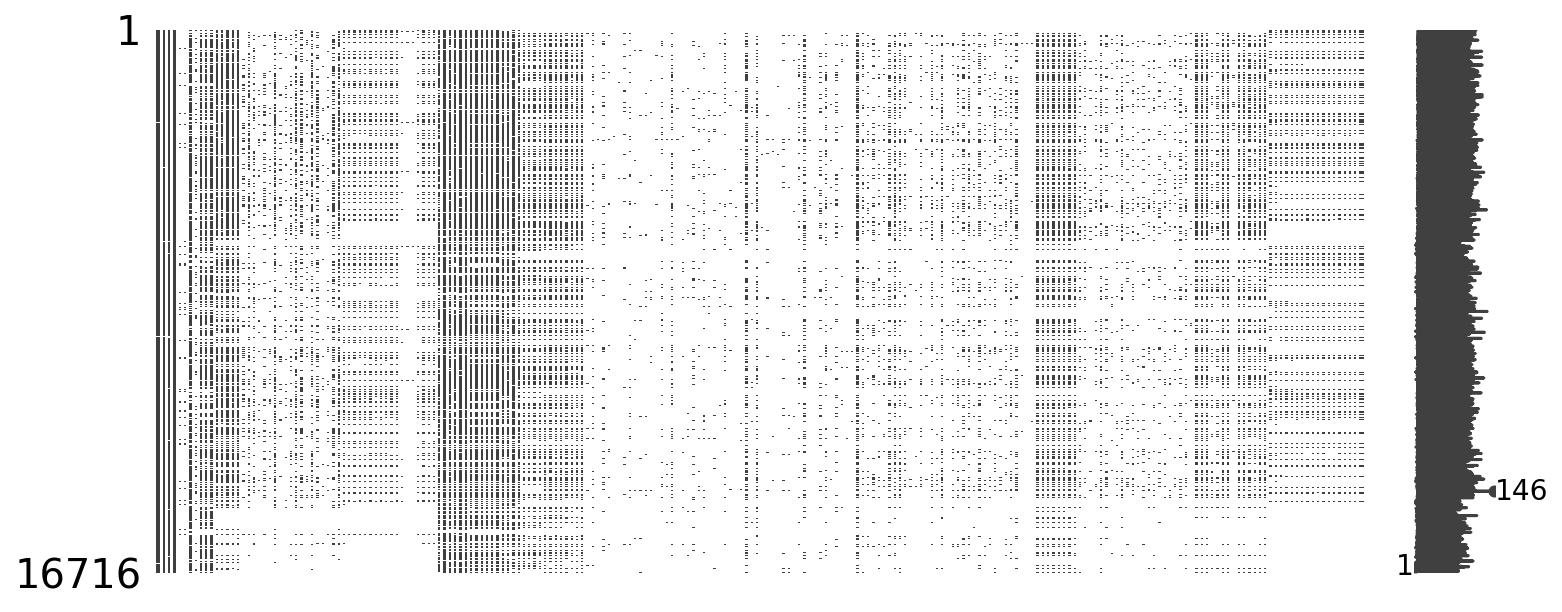

In [16]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


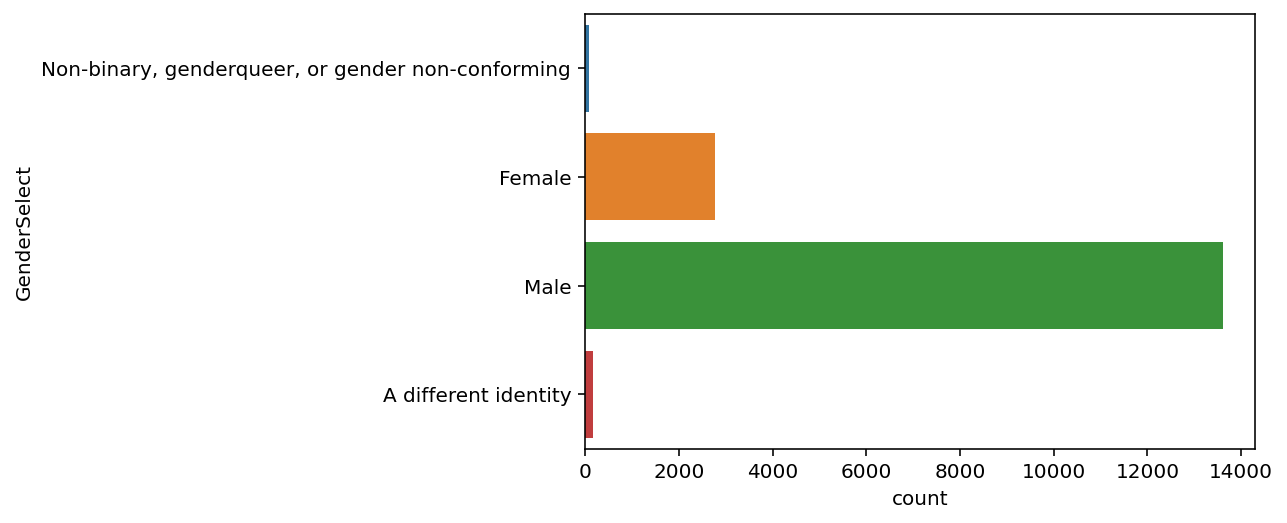

In [17]:
sns.countplot(y='GenderSelect', data=mcq)

In [18]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
# 'country' 컬럼을 인덱스로 지정해주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
# 우리 나라는 18위이고 전체52개국에서 참여했지만 20위까지만 본다.
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [19]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [ ]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

In [ ]:
sns.countplot(y='FormalEducation', data=mcq)

In [ ]:
# normalize=True 옵션을 사용하면, 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

In [ ]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

In [ ]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수','비율']
mcq_es_df

In [ ]:
sns.countplot(y='EmploymentStatus', data=mcq)

In [ ]:
# 프로그래밍 경험
sns.countplot(y='Tenure', data=mcq)

In [ ]:
# 우리나라의 실정 보기
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [ ]:
pd.DataFrame(korea['GenderSelect'].value_counts())

In [ ]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist=False, color=sns.color_palette('Paired')[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False, color=sns.color_palette('Paired')[0], ax=ax2)
plt.title('korean Male')

In [ ]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

In [ ]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [ ]:
# 자주묻는질문 FAQ

sns.countplot(y='LanguageRecommendationSelect', data=mcq)

In [ ]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [ ]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

In [ ]:
# 현재 하고 있는 일에 대한응답을 해준 사람중 python과 r을 사용하는 사람
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) &
           ((mcq['LanguageRecommendationSelect']=='Python') |
           (mcq['LanguageRecommendationSelect']== 'R'))]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect',
              hue='LanguageRecommendationSelect',
              data=data)
# R을 선호하는 직업군을 찾아볼수 있다!

In [ ]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent,
    left_index=True,
    right_index=True).head(20)

mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

In [ ]:
# 내년에 많이사용할 툴
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

In [ ]:
# 내년에 사용할 메소드
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [ ]:
# 어디에서 데이터 사이언스를 배워야할지!
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str')
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

In [ ]:
# 설문 내용과 누구에게 물어봤는지

qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

In [ ]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]
use_features

In [ ]:
# 학습플랫폼과 유용함에 대한 연관성 살피기
fdf = {}
for feature in use_features:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계 그려보기
plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values(
    'Very useful', ascending=False), annot=True)

In [ ]:
# 유용함의 정도를 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title='Usefullness of Learning Platsforms')

In [ ]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]
cat_features

In [ ]:
cdf = {}
for feature in cat_features:
  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해 담아옴
cdf = pd.Series(cdf)
cdf

In [ ]:
plt.pie(cdf, labels=cdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt. axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

In [ ]:
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

In [49]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [50]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x : x.split(','))
s = mcq.apply(lambda x:
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [51]:
s = s[s!= 'nan']

In [52]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
GCE ...),669
Azure,669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


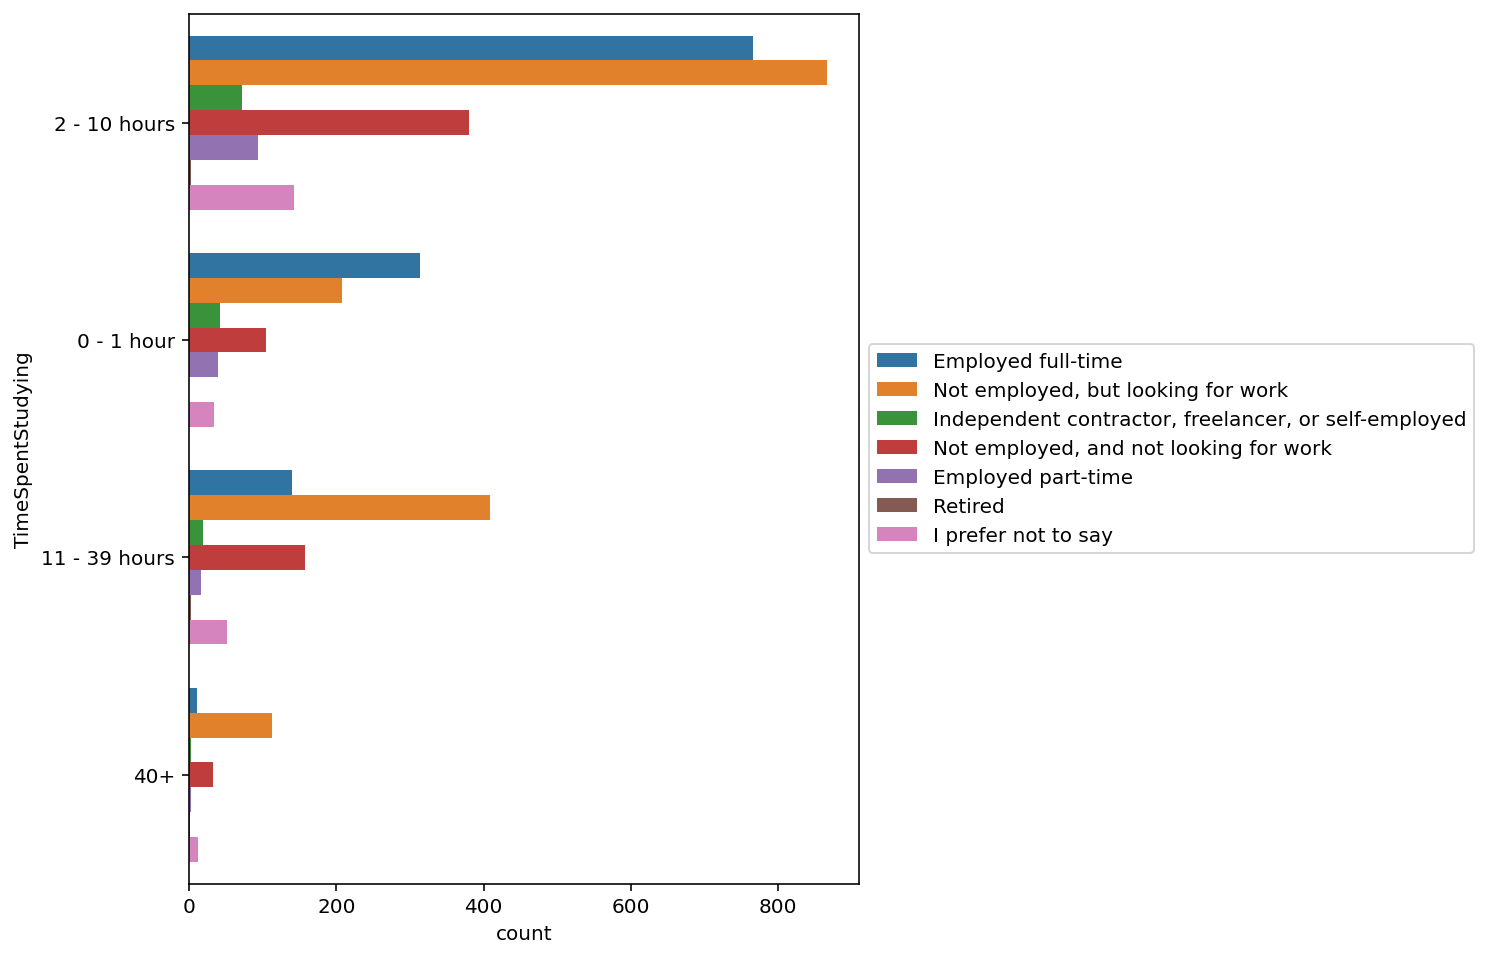

In [53]:
# 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?(주당시간)
# 유직, 무직자 나눠서 보기
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',
              data=mcq,
              hue='EmploymentStatus'
              ).legend(loc='center left',
                       bbox_to_anchor=(1,0.5))

In [54]:
# 강의에서 변수설정없이 막 만들어짐.


# figure, (ax1, ax2) = plt.subplots(ncols=2)

# figure.set_size_inches(12,5)
# sns.countplot(x='TimeSpentStudying',
#               data=full_time,
#               hue='EmploymentStatus', ax=ax1
#               ).legend(loc='center left',
#                        bbox_to_anchor=(1,0.5))
              
# sns.countplot(x='TimeSpentStudying',
#               data=looking_for_job,
#               hue='EmploymentStatus', ax=ax2
#               ).legend(loc='center right',
#                        bbox_to_anchor=(1,0.5))      

In [55]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x : x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [56]:
s = mcq.apply(lambda x : pd.Series(x['BlogsPodcastsNewslettersSelect']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Platforms'
s.head()
s.shape

(26794,)

In [57]:
s = s[s != 'nan'].value_counts().head(20)

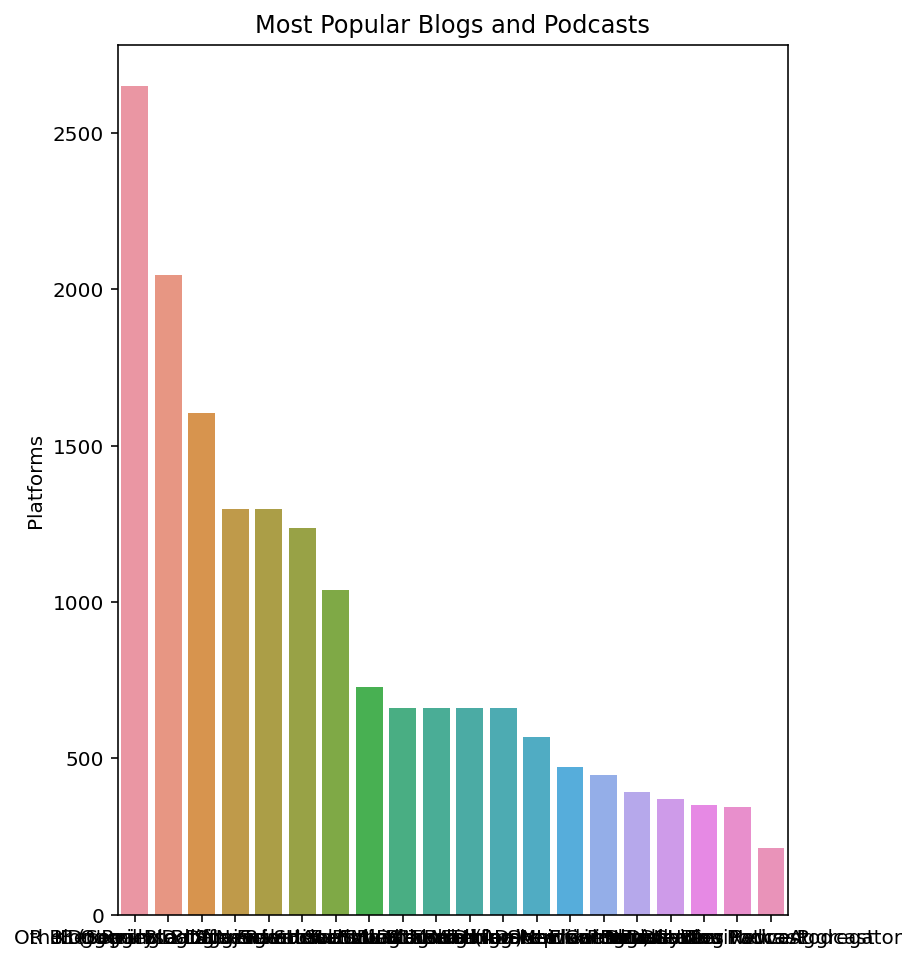

In [58]:
plt.figure(figsize=(6,8))
plt.title('Most Popular Blogs and Podcasts')
sns.barplot(x=s.index, y=s)

In [59]:
# 인기있는 플랫폼 코스플랫폼

mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [60]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [61]:
t = t[t != 'nan'].value_counts()

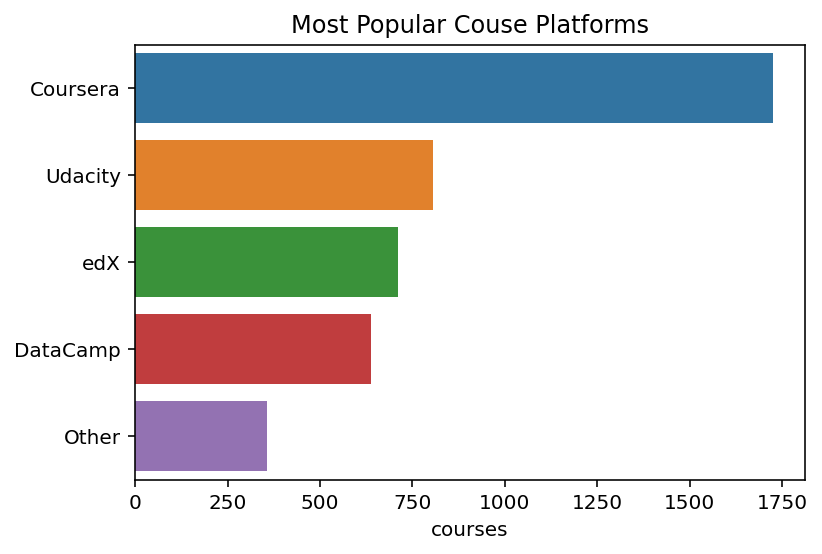

In [62]:
plt.title("Most Popular Couse Platforms")
sns.barplot(y=t.index, x=t)

In [63]:
# 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?
job_features = [x for x in mcq.columns if x.find('JobSkillImportance') != -1
               and x.find('JobSkillImportanceOther') == -1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [64]:
jdf = {}
for feature in job_features:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  jdf[feature[len('JobSkillImortance'):]] = a

jdf

{'eBigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'eDegree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'eEnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'eKaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'eMOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'ePython': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'eR': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'eSQL': Nice 

In [65]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
eBigData,0.379929,0.574065,0.046006
eDegree,0.279867,0.598107,0.122026
eStats,0.513889,0.457576,0.028535
eEnterpriseTools,0.144829,0.564970,0.290200
ePython,0.645994,0.327214,0.026792
eR,0.414807,0.513945,0.071247
eSQL,0.434224,0.491778,0.073998
eKaggleRanking,0.118863,0.677261,0.203876
eMOOC,0.107255,0.606994,0.285752
eVisualizations,0.455392,0.490820,0.053788


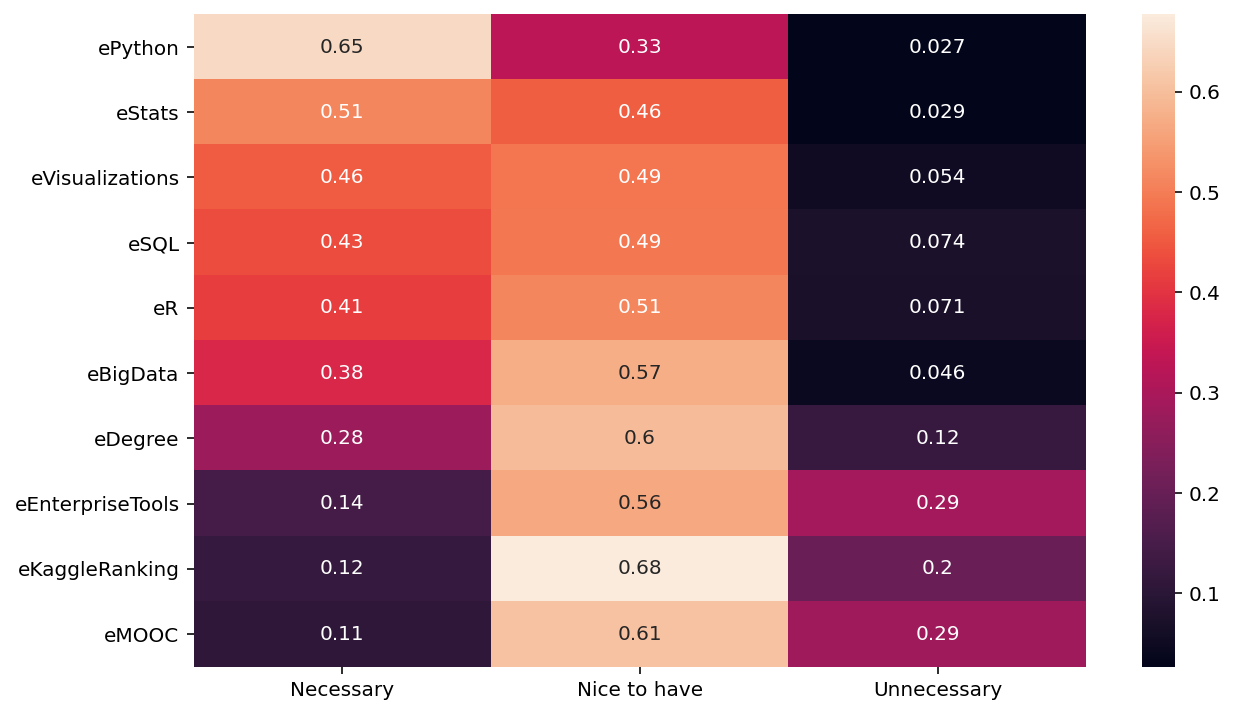

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values('Necessary',ascending=False), annot=True)

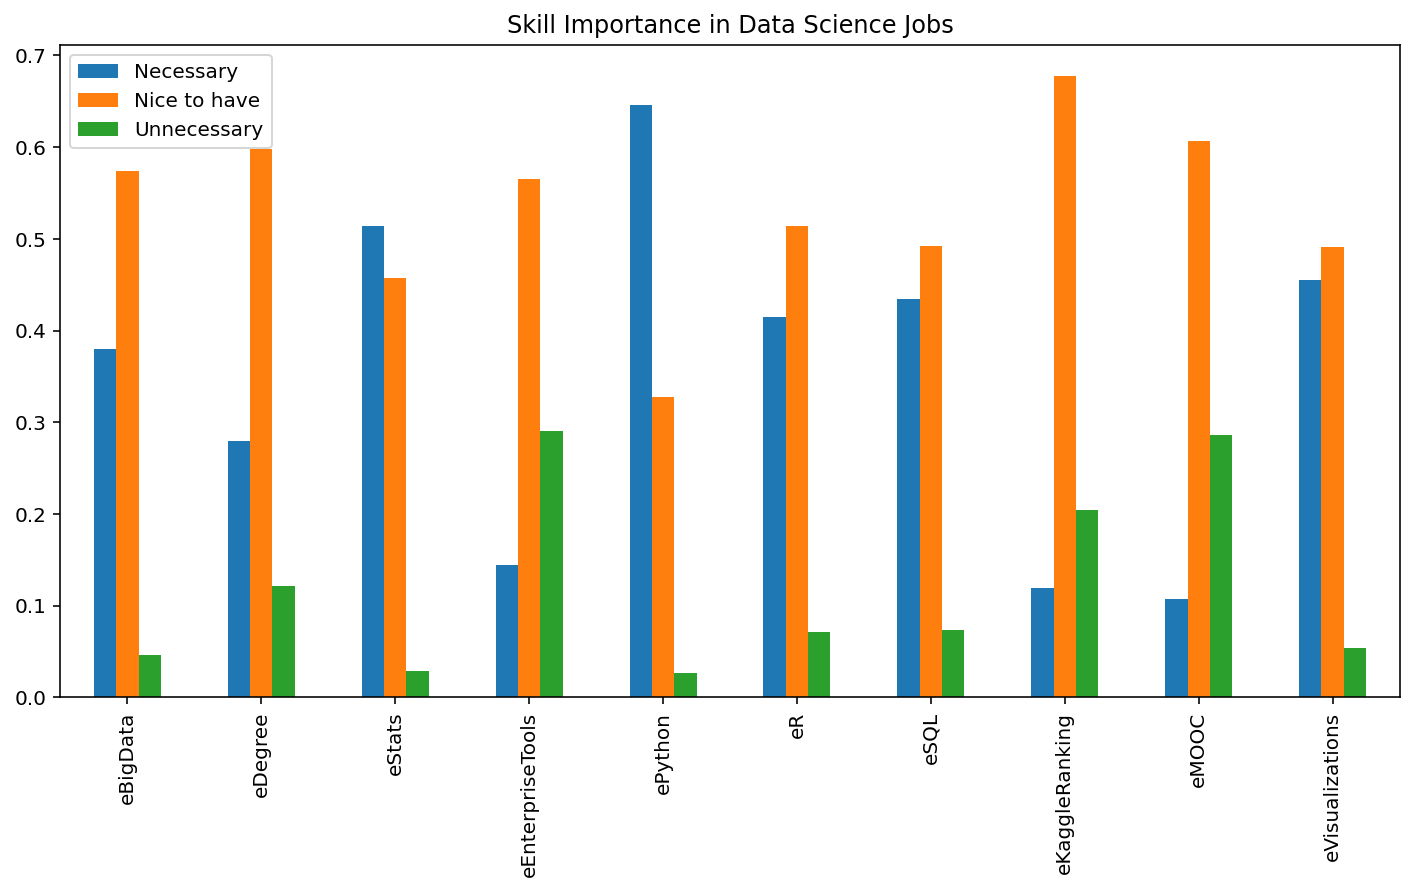

In [67]:
jdf.plot(kind='bar', figsize=(12,6),
         title='Skill Importance in Data Science Jobs')

In [68]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [69]:
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)

salary = mcq[['CompensationAmount','CompensationCurrency', 'GenderSelect','Country', 'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on = 'CompensationCurrency',
                      right_on = 'originCountry', how = 'left')

salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [70]:
print('Maximaum Salary is USD $',
      salary['Salary'].dropna().astype(int).max())
print('Maximaum Salary is USD $',
      salary['Salary'].dropna().astype(int).min())
print('Maximaum Salary is USD $',
      salary['Salary'].dropna().astype(int).median())

# 가장 큰 수치는 여러 국가들의 GDP보다 크다고 하니 가짜응답이며 평균급여는 아래와 같다.
# 그래프를 잘 표현하기 위해 50만불 이상의 데이터만 displot으로 그려보기

Maximaum Salary is USD $ 28297400000
Maximaum Salary is USD $ 0
Maximaum Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


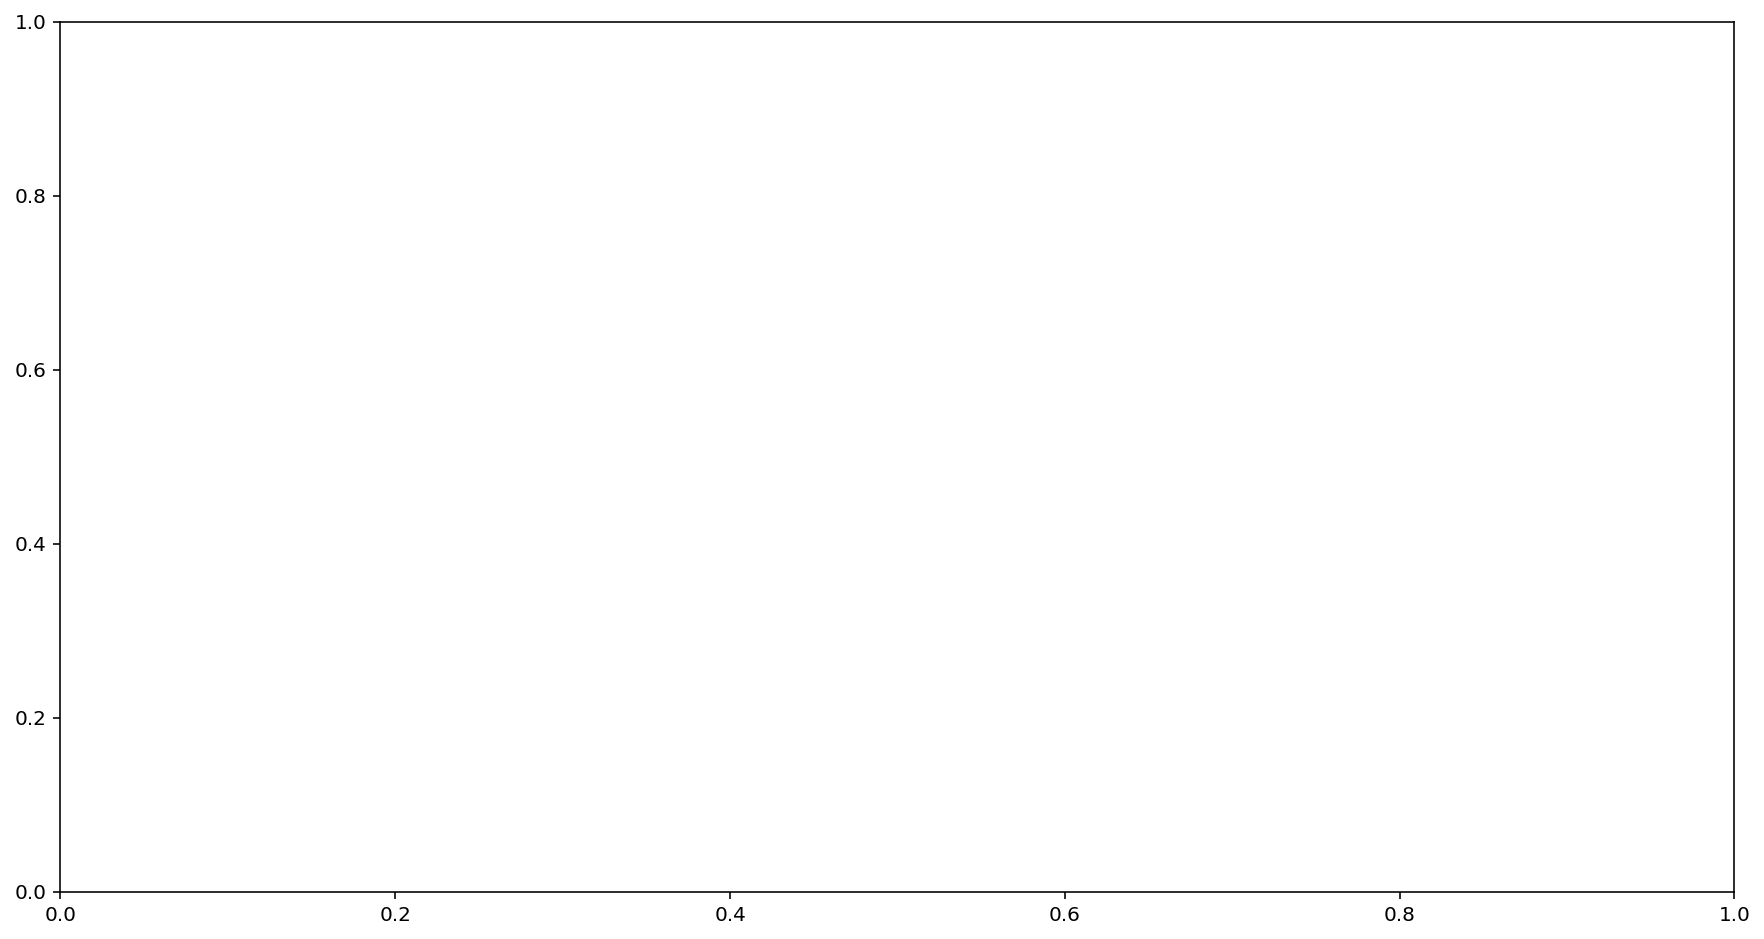

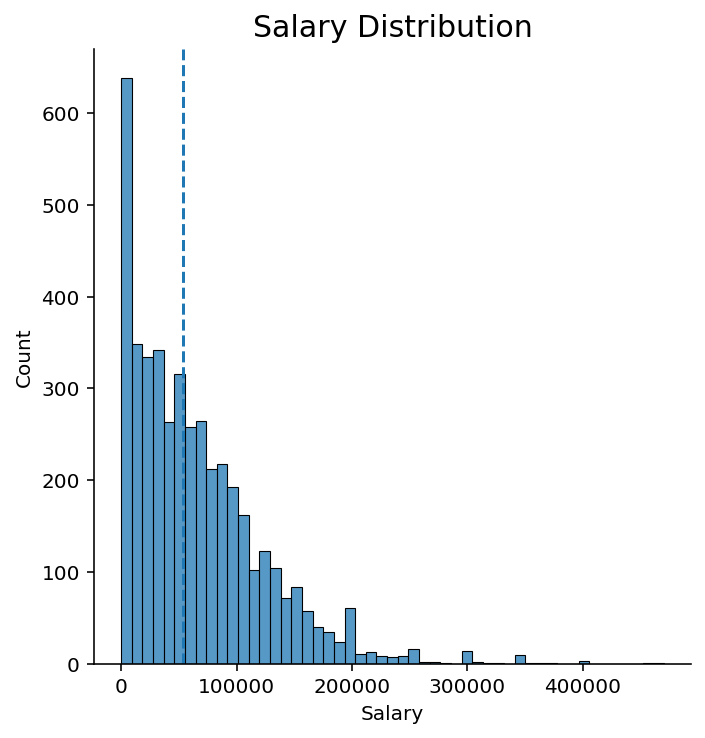

In [71]:
plt.subplots(figsize=(15,8))
salary= salary[salary['Salary']<500000]
sns.displot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed') # 원하는 값에 점선 그려주기
plt.title('Salary Distribution', size =15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

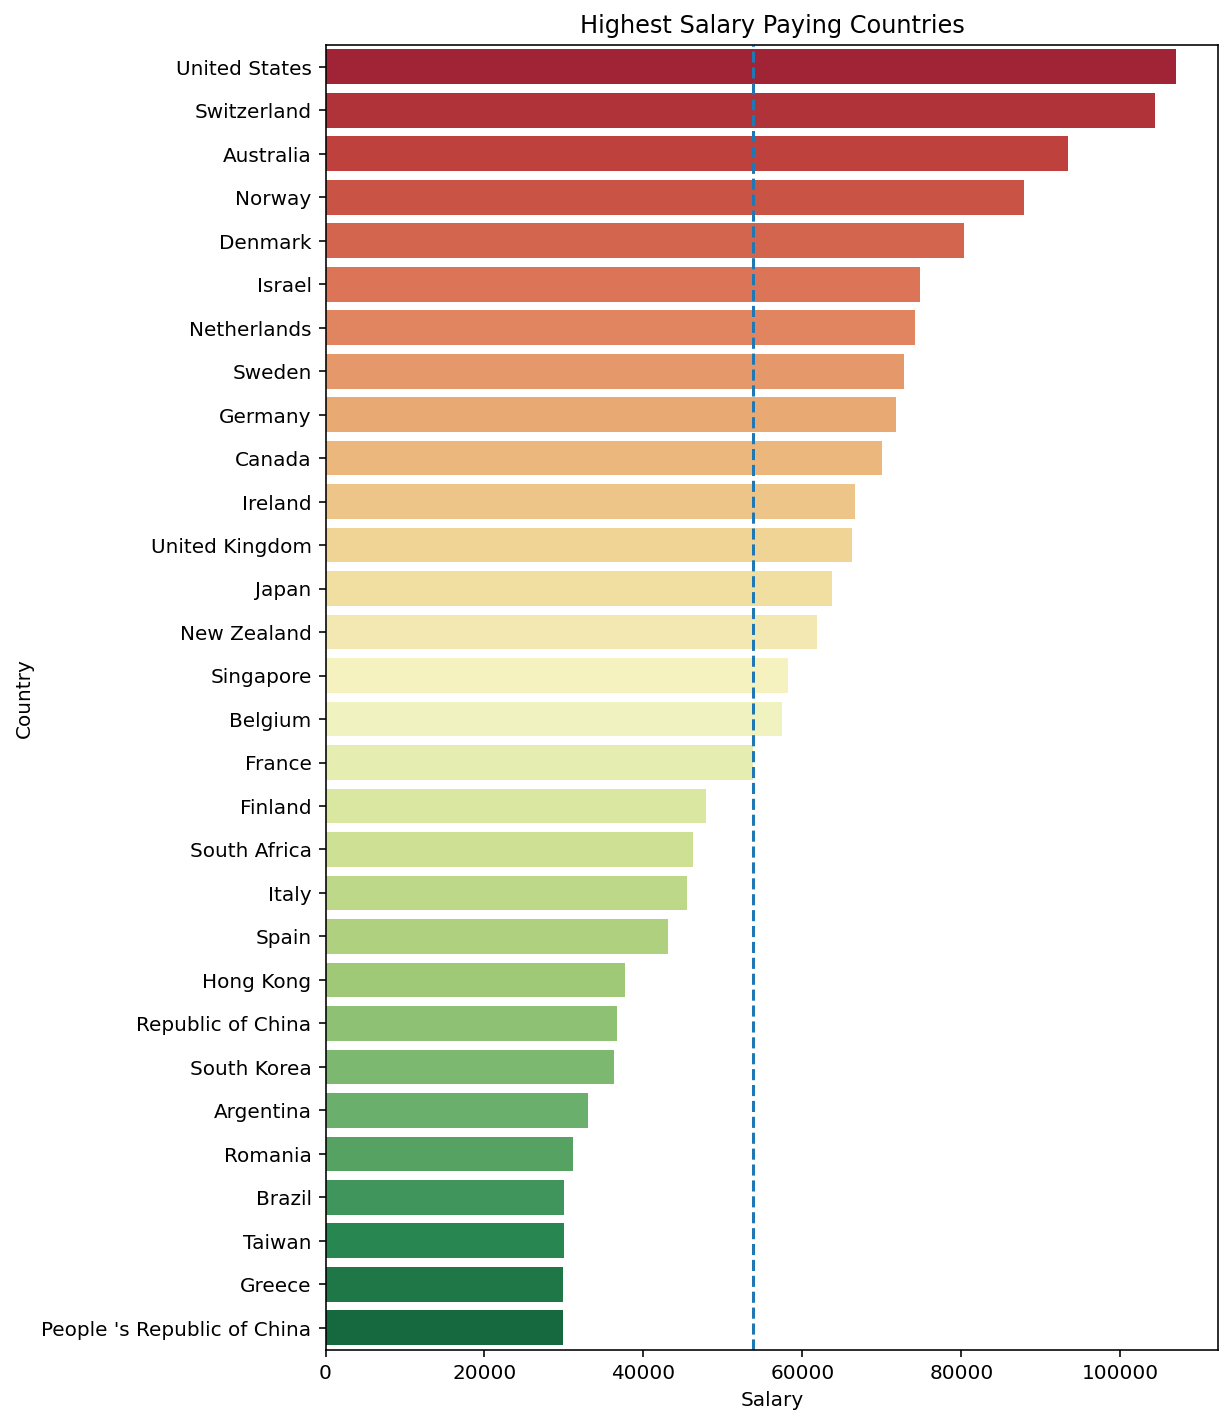

In [72]:
# 나라별 임금격차
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby('Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()

sns.barplot('Salary', sal_coun.index,
            data = sal_coun, palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

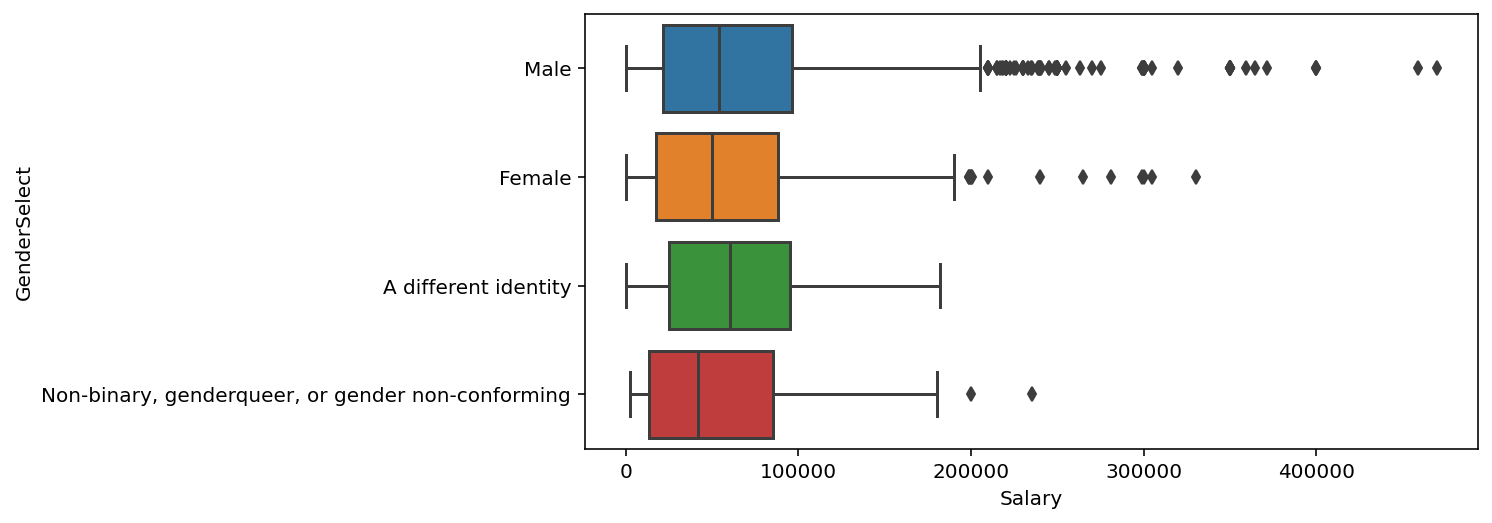

In [73]:
# 성별 임금격차
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

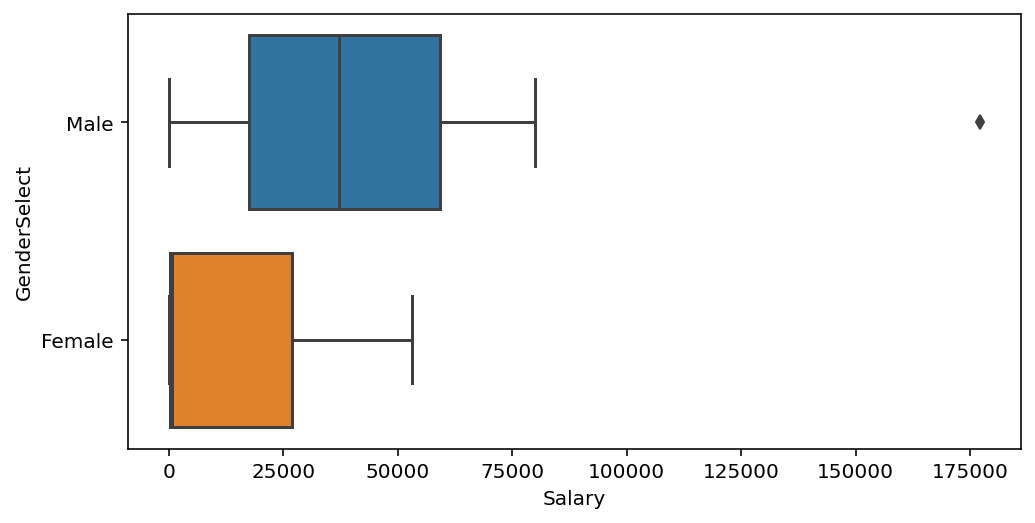

In [74]:
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary_korea)
# 응답자 수가 많지않고 잘못입력된거같아 일반화 하기 어렵다.

In [75]:
salary_korea.shape

(26, 8)

In [76]:
salary_korea[salary_korea['GenderSelect'] == 'Female']
# 남성23, 여성은 고작 3명뿐.

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [77]:
salary_korea_male = salary_korea[salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [78]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


In [79]:
# 개인 프로젝트나 학습용 데이터를 어디서 얻는지 설문***
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x : x.split(","))

In [80]:
q = mcq.apply(lambda x : pd.Series(x['PublicDatasetsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

In [81]:
q = q[q != 'nan'].value_counts()

In [82]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


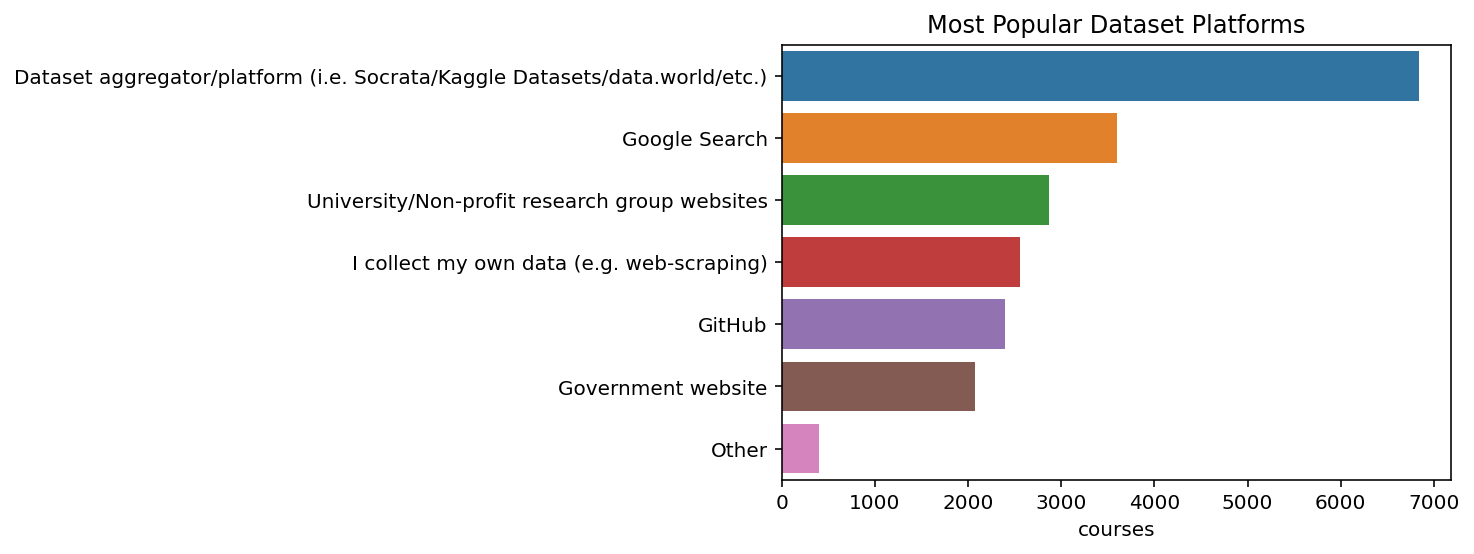

In [83]:
plt.title('Most Popular Dataset Platforms')
sns.barplot(y=q.index, x=q)

In [84]:
# 주관식 응답 읽어오기
ff = pd.read_csv('freeformResponses.csv', encoding='ISO-8859-1', low_memory=False)
ff.shape

(16716, 62)

In [85]:
ff

,GenderFreeForm,KaggleMotivationFreeForm,CurrentJobTitleFreeForm,MLToolNextYearFreeForm,MLMethodNextYearFreeForm,LanguageRecommendationFreeForm,PublicDatasetsFreeForm,PersonalProjectsChallengeFreeForm,LearningPlatformCommunityFreeForm,LearningPlatformFreeForm1,LearningPlatformFreeForm2,LearningPlatformFreeForm3,LearningPlatformUsefulnessCommunitiesFreeForm,LearningPlatformUsefulnessFreeForm1Select,LearningPlatformUsefulnessFreeForm1SelectFreeForm,LearningPlatformUsefulnessFreeForm2Select,LearningPlatformUsefulnessFreeForm2SelectFreeForm,LearningPlatformUsefulnessFreeForm3Select,LearningPlatformUsefulnessFreeForm3SelectFreeForm,BlogsPodcastsNewslettersFreeForm,JobSkillImportanceOtherSelect1FreeForm,JobSkillImportanceOtherSelect2FreeForm,JobSkillImportanceOtherSelect3FreeForm,CoursePlatformFreeForm,HardwarePersonalProjectsFreeForm,ProveKnowledgeFreeForm,ImpactfulAlgorithmFreeForm,InterestingProblemFreeForm,DataScienceIdentityFreeForm,MajorFreeForm,PastJobTitlesFreeForm,FirstTrainingFreeForm,LearningCategoryOtherFreeForm,MLSkillsFreeForm,MLTechniquesFreeform,EmployerIndustryOtherFreeForm,EmployerSearchMethodOtherFreeForm,JobFunctionFreeForm,WorkHardwareFreeForm,WorkDataTypeFreeForm,WorkLibrariesFreeForm,WorkAlgorithmsFreeForm,WorkToolsFreeForm1,WorkToolsFreeForm2,WorkToolsFreeForm3,WorkToolsFrequencySelect1FreeForm,WorkFrequencySelect2FreeForm,WorkFrequencySelect3FreeForm,WorkMethodsFreeForm1,WorkMethodsFreeForm2,WorkMethodsFreeForm3,WorkMethodsFrequencySelect1FreeForm,WorkMethodsFrequencySelect2FreeForm,WorkMethodsFrequencySelect3FreeForm,TimeOtherSelectFreeForm,WorkChallengesFreeForm,WorkChallengeFrequencyOtherFreeForm,WorkMLTeamSeatFreeForm,WorkDataStorageFreeForm,WorkCodeSharingFreeForm,SalaryChangeFreeForm,JobSearchResourceFreeForm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data manipulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,"It's not deployed yet, but hopefully a computa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Clustering Methods, association rules",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I can't find time to practice consistently,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sentiment analysis of twitter data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,teacher,NaN,NaN,NaN,NaN,NaN,NaN,Meetups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connectivity/data fusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,I use mid-level data science paired with high-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,svm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,python;scikit-learn; panda; numpy;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,online courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"tensorflow, CNN libraries, Keras, NEST",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diabetic Retinopathy problem on Kaggle,

In [86]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [87]:
# 개인 프로젝트에서 공개 된 데이터 셋을 다루는데 가장 어려운 점은 무엇인가?

ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

# 결국 정제. 데이터 전처리가 가장 어렵고 시간을 많이 쓰는것을 알 수 있다.

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
Size,9
-,9


In [88]:
# 데이터 사이언스에서 가장 많은 시간을 필요로하는 일
time_features = [x for x in mcq.columns if x.find('Time') != -1][4:10]
time_features

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



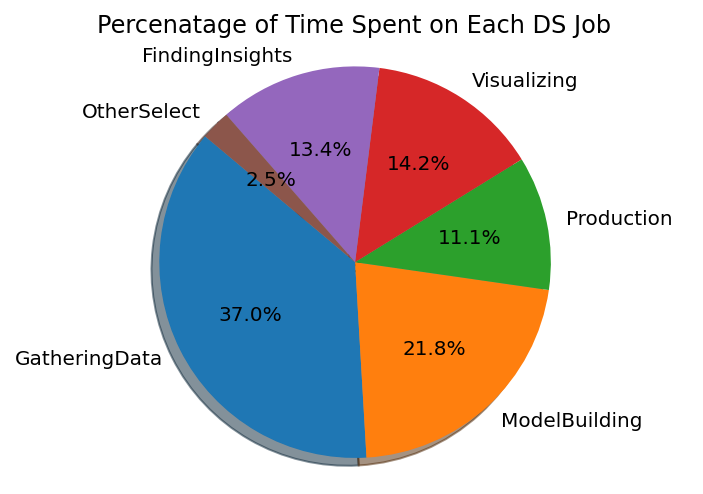

In [89]:
tdf = {}
for feature in time_features:
  tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percenatage of Time Spent on Each DS Job')
plt.show()

In [90]:
# 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇인가.
# 어떠한 답변들이 있는지 확인해보기
qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [91]:
job_factors = [ x for x in mcq.columns if x.find('JobFactor') != -1]

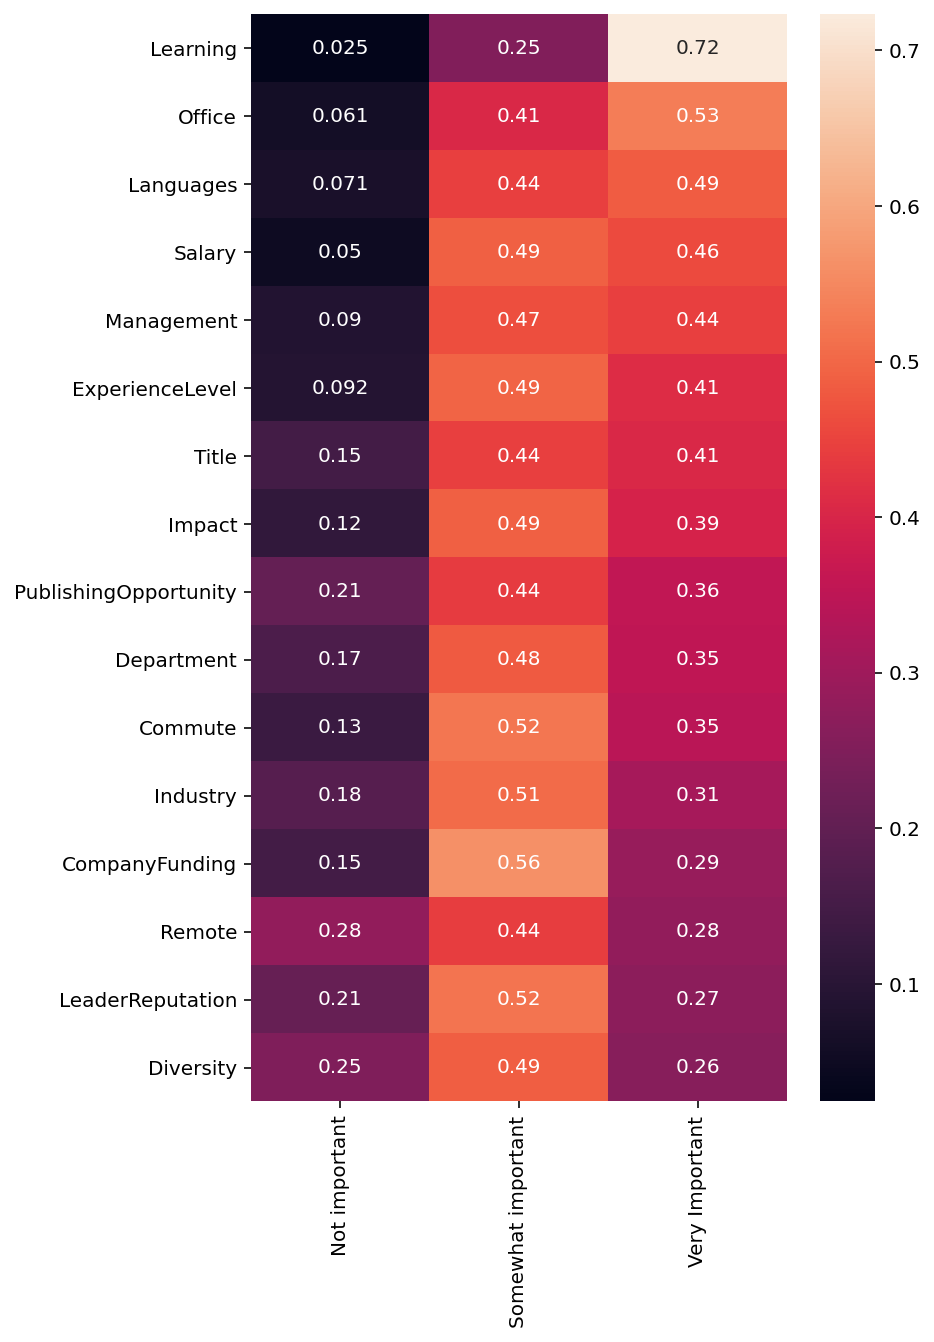

In [92]:
jfdf = {}
for feature in job_factors:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()
plt.figure(figsize=(6,10))
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True)

# 데이터 사이언티스트들 한테는 얼마나 배울수 있는곳인지가 가장 고려해야할 요소로 생각된다.

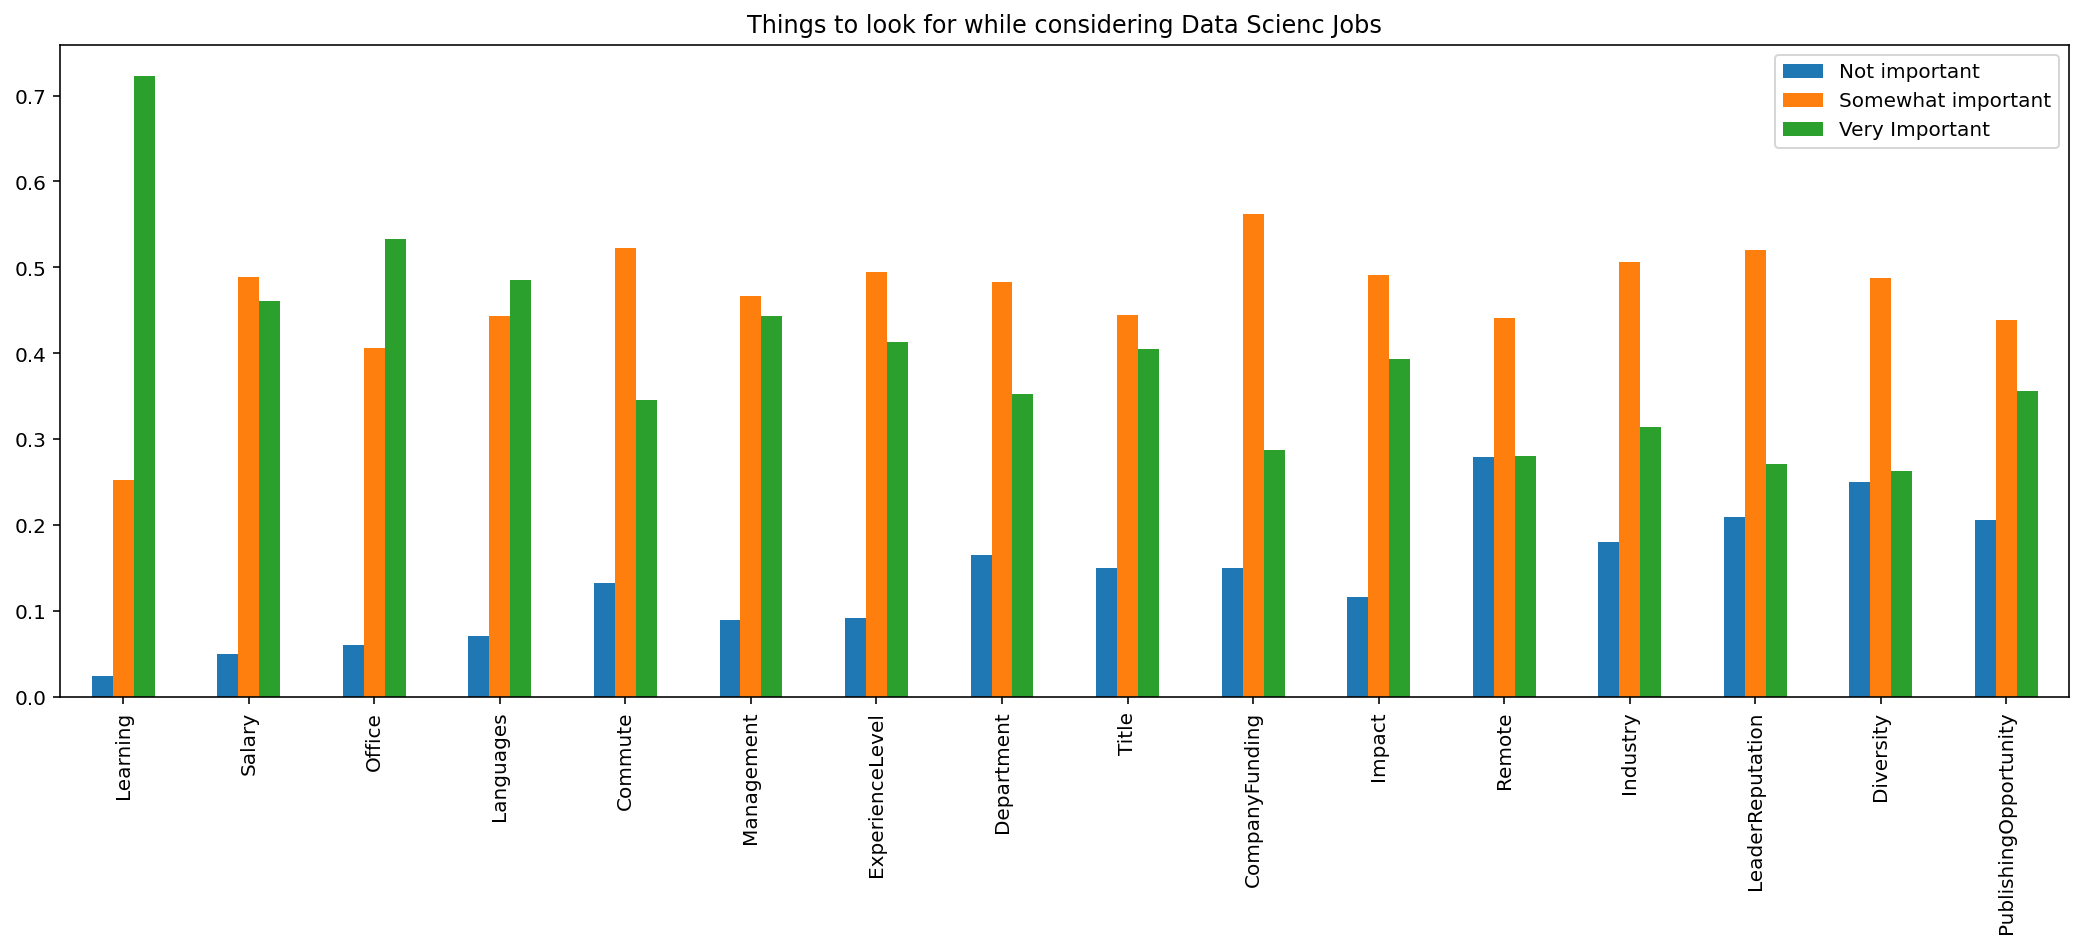

In [93]:
jfdf.plot(kind='bar', figsize=(18,6),
          title='Things to look for while considering Data Scienc Jobs')
plt.show()

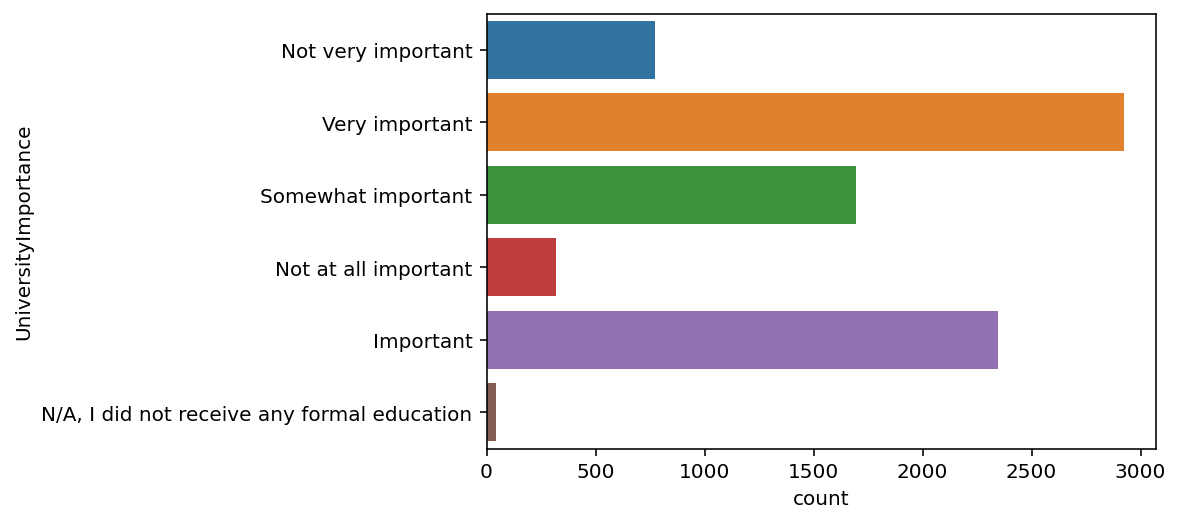

In [94]:
# 데이터 사이언티스트가 되기 위해 학위가 중요한가?
sns.countplot(y='UniversityImportance', data=mcq)

In [95]:
# plotly툴을 사용해서 연령대별 대학교육의 중요성을 그래프로 표현해보기 
# colab에서는 표시가안됨ㅠㅠ
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact


top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
  top_uni_dist.append(
      mcq[(mcq['Age'].notnull()) & (mcq['UniversityImportance'] == uni)]['Age']
  )

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

# 대부분의 캐글러가 석박사인것을 감안했을때 중요도는 자연스럽게 중요하다고 표시되기 마련

In [ ]:
# 어디에서부터 데이터사이언스를 시작해야 할까요?
mcq[mcq['FirstTrainingSelect'].notnull()].shape

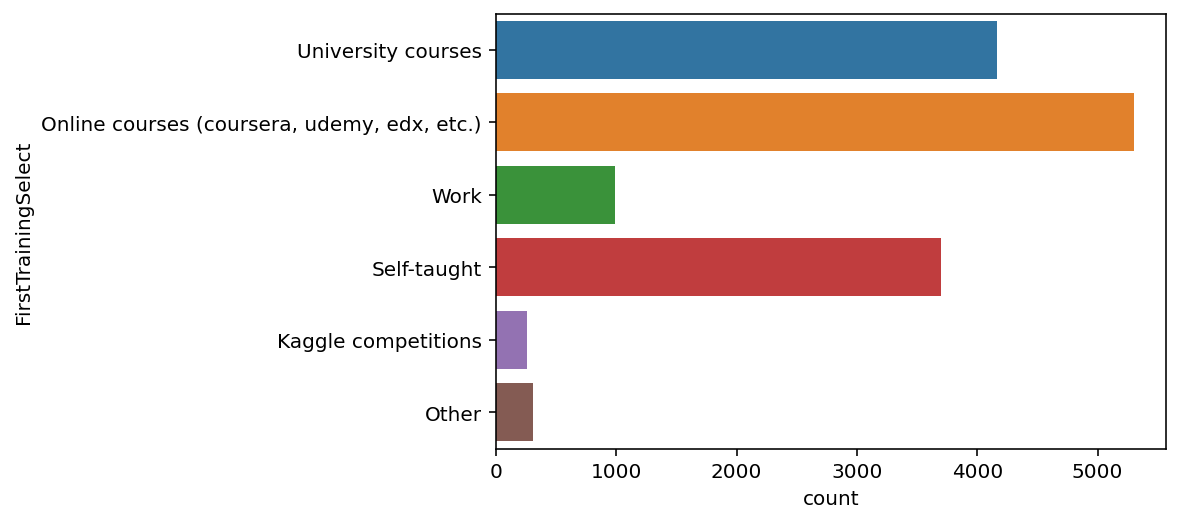

In [97]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

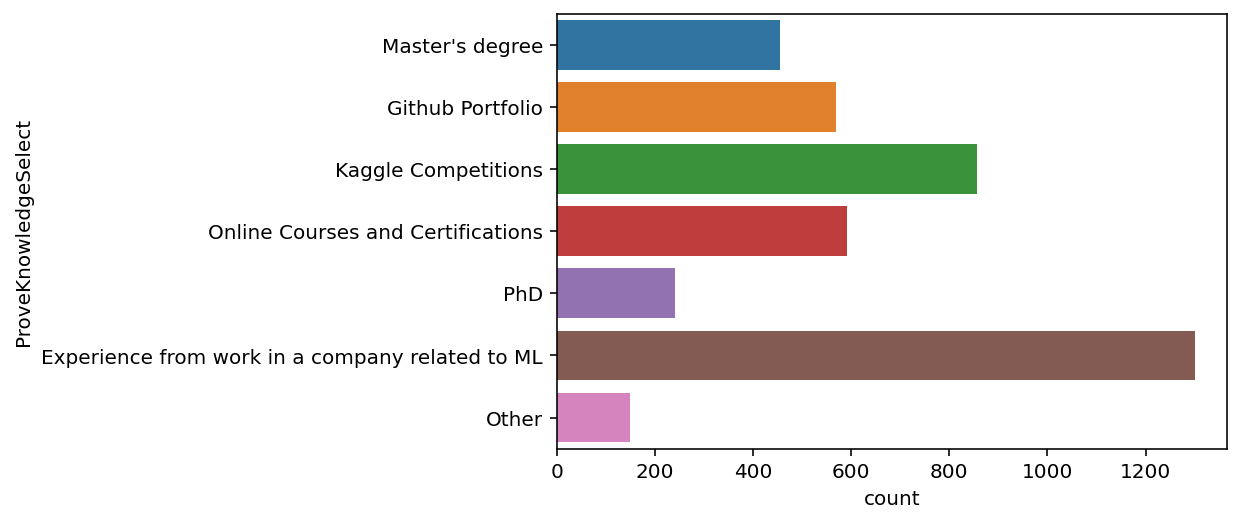

In [98]:
# 데이터 사이언티스 이력서에서 가장 중요한 것은?
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

In [99]:
# 머신러닝 알고리즘을 사용하기 위해 수학이 필요한가??
# scikit과 같은 라이브러리는 세부 정보를 추상화하여 기본기술은 몰라도 ML 모델을 프로그래밍할 수 있다.
# 그럼에도 그 안에 있는 수학을 아는 것이 중요할까??

qc = question.loc[question['Column'].str.contains('AlgrithmUnderstandingLevel')]
qc

,Column,Question,Asked


In [100]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

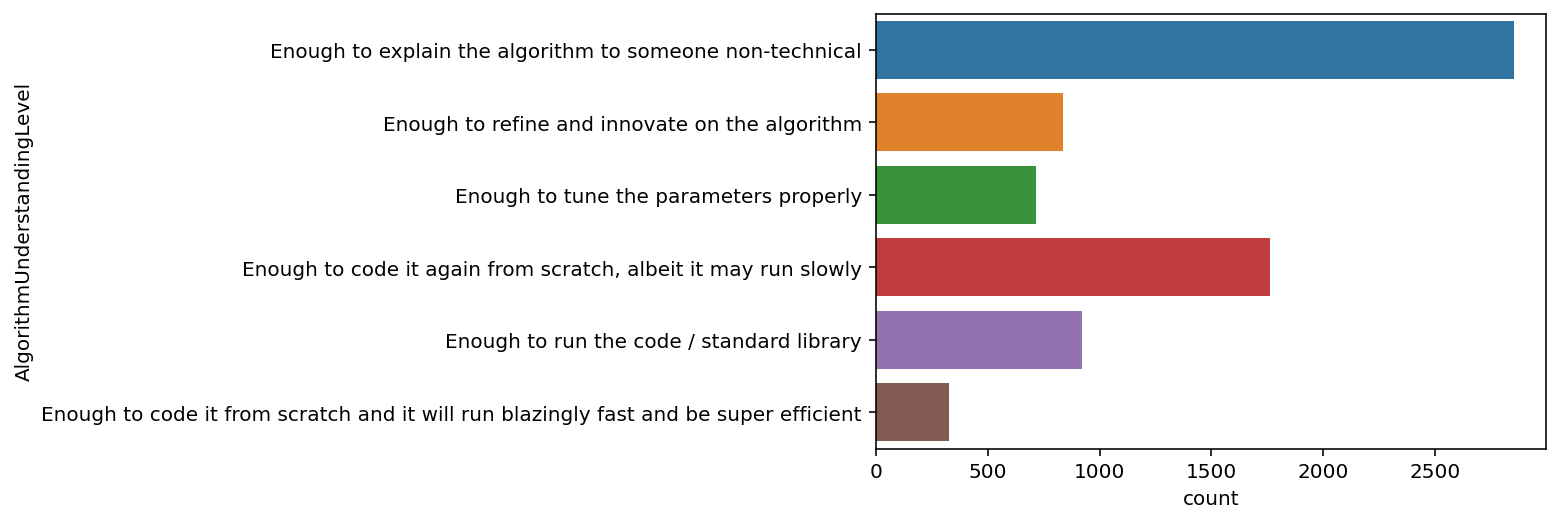

In [101]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)
# 남들에게 설명할 정도는 아는것이 중요하다고 생각하는 사람이 대다수.
# 좀 걸려도 밑바닥부터 다시 코딩해보는게 중요하다는 응답이 2위이다.

In [102]:
# 어디에서 일을 찾아야 할까요?
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


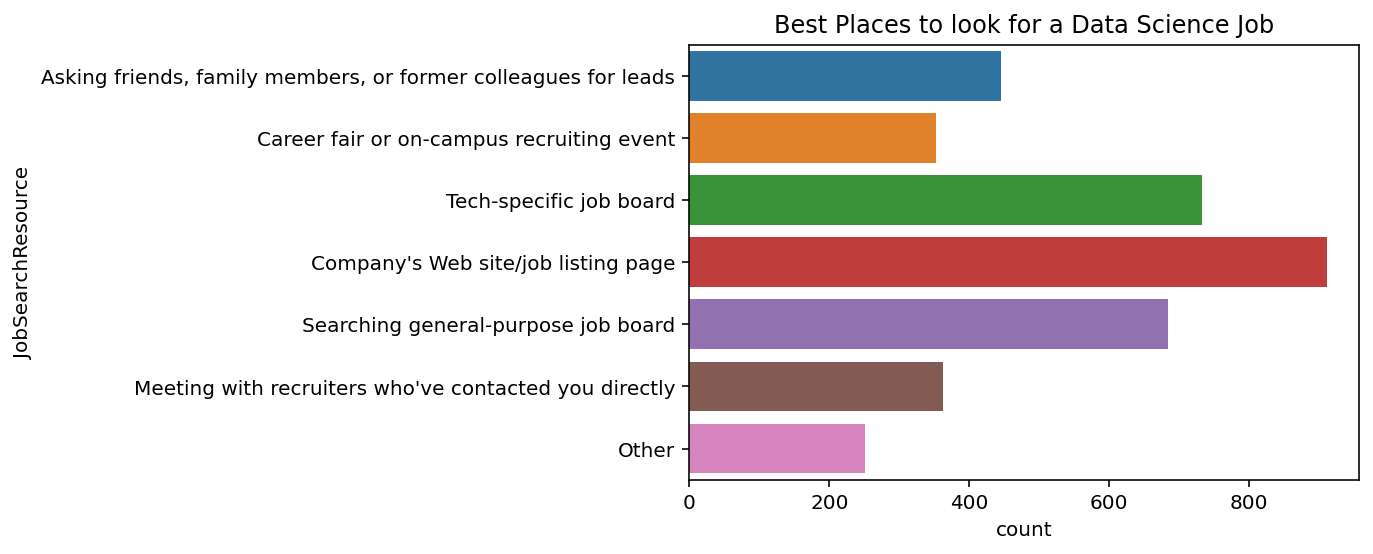

In [103]:
plt.title('Best Places to look for a Data Science Job')
sns.countplot(y='JobSearchResource', data=mcq)
# 보통 구직사이트, 사이트 보드

In [ ]:
plt.title('Top Places to get Data Science Jobs')
sns.countplot(y='EmployerSearchMethod', data=mcq)
# 채용자들을 어디서 사람들을 채용하는지?!
# 친구나 이전 직장동료등 추천을 통해 구하고, 특정 사람에게.

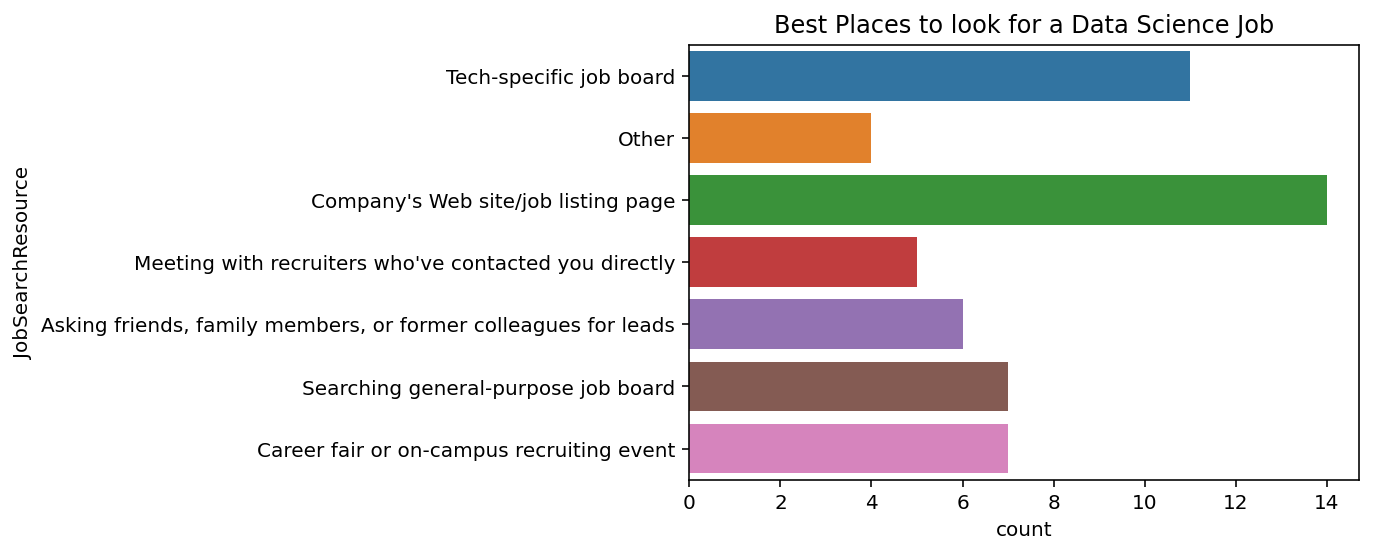

In [105]:
plt.title('Best Places to look for a Data Science Job')
sns.countplot(y='JobSearchResource', data=korea)
# 한국만 따로 분석해도 다른 나라들과 비슷함을 볼 수 있음
# 사이트를 통해 더 채용을 한다는점이 좀 다름

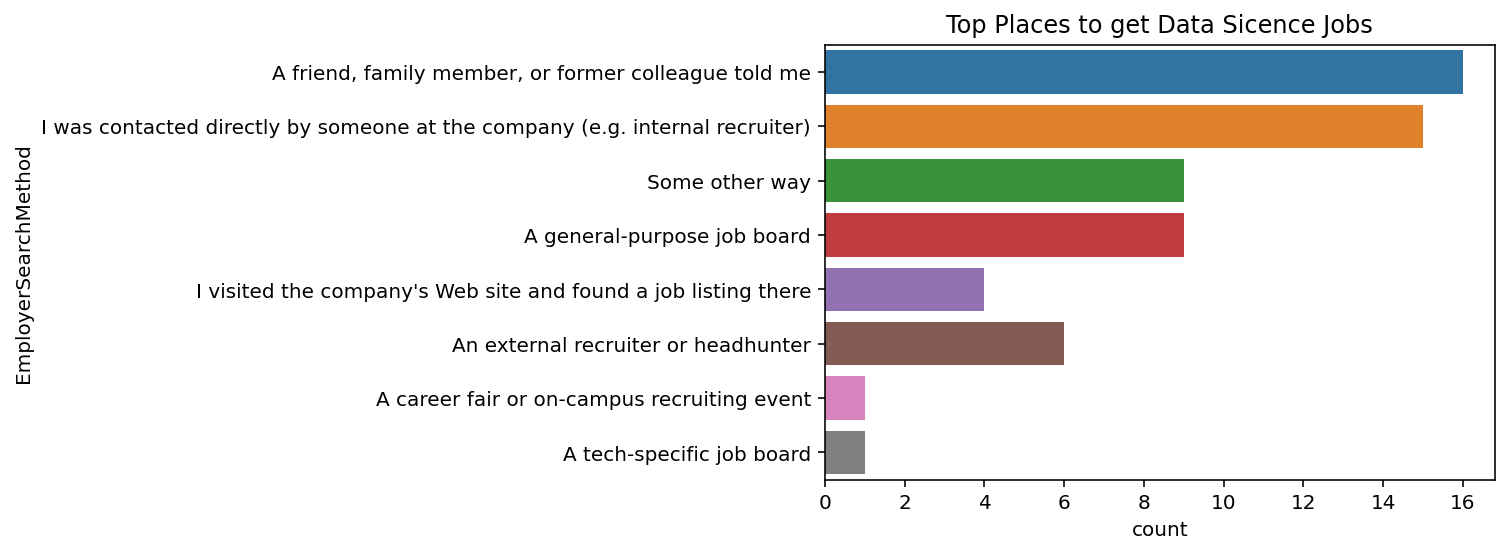

In [106]:
plt.title('Top Places to get Data Sicence Jobs')
sns.countplot(y='EmployerSearchMethod', data=korea)
# 아는사람을 통해 일을 얻는경우가 한국에선 대다수임을 알 수 있다.

In [107]:
# 이로서 EDA 탐색적 데이터 분석은 마무리되었다.
# Python이 R보다 훨씬 많이 사용됨.
# 모두 사용하는사람도 많음.(석,박사과정의 영향이 큰것 같음.)
# 데이터의 수집과 정제가 어려운일임
# 학습플랫폼, 채널등을 알게 됨
# 내년에 인기있는 기술 -> 딥러닝, 텐서플로우